# Samuel Vasco Gonzalez CC 1152223665

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
%pylab inline
import pandas as pd
from sklearn import datasets
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


# Exercise 1

In [3]:
data=pd.read_csv("mnist_test.csv")
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_data_target=data['label']
y_data_target

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [5]:
X_data_features=data.drop(['label'], axis=1)
X_data_features

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


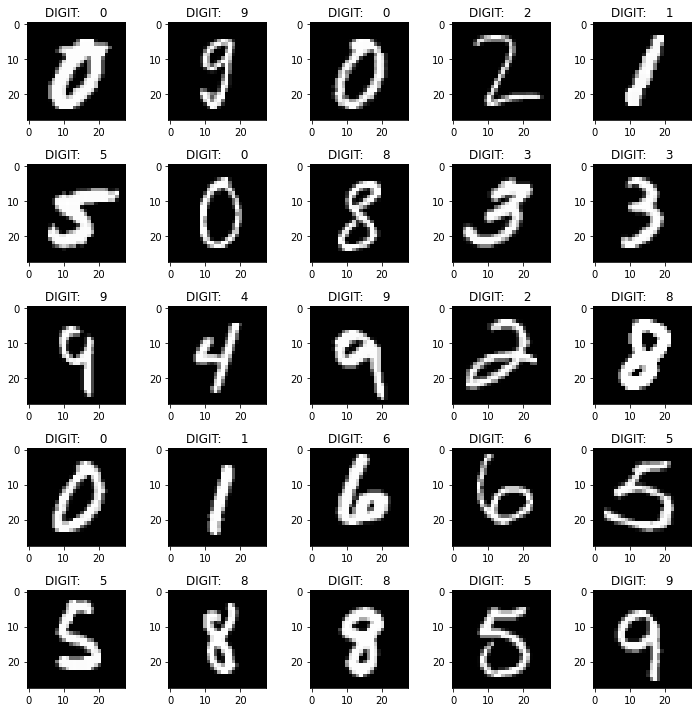

In [14]:

fig, axs = plt.subplots(5, 5)
fig=figsize(15,15)
for i in range(5):
  for j in range(5):
    random = np.random.randint(10000) #random integer number generation
    row_pixels=X_data_features.iloc[random].values #pixels of the image 
    axs[i, j].imshow(row_pixels.reshape(28,28),cmap = "gray") #plot the digit randomly
    axs[i, j].set_title('DIGIT: {0:5d}'.format(y_data_target[random]))#title of plot
plt.tight_layout() #method that tunning parameters of image

# Excercise 2

In [7]:
digits = datasets.load_digits() # digits is a dictionary
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

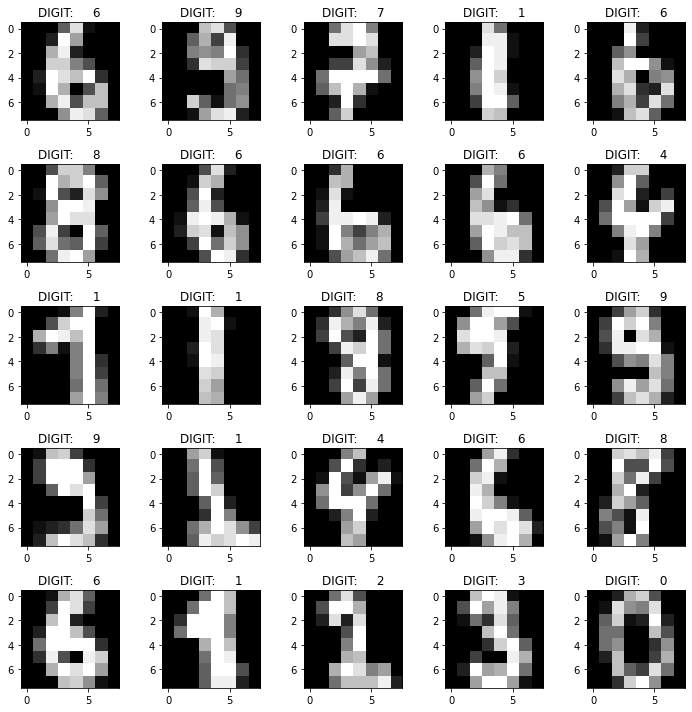

In [8]:
fig, axs = plt.subplots(5, 5)
fig=figsize(10,10)
for i in range(5):
  for j in range(5):
    random = np.random.randint(1797) #random integer number generation
    image_pixels=digits['images'][random] #pixels of the image 
    axs[i, j].imshow(image_pixels,cmap = "gray") #plot the digit randomly
    axs[i, j].set_title('DIGIT: {0:5d}'.format(digits['target'][random]))#title of plot
plt.tight_layout() #method that tunning parameters of image

# Excercise 3

In [9]:
(X_data, y_data), (_, _) = tf.keras.datasets.cifar10.load_data()

In [10]:
y_data=y_data.reshape(50000)
dict={0:'airplane',
1:	'automobile',
2:	'bird',
3:	'cat',
4:	'deer',
5:	'dog',
6:	'frog',
7:	'horse',
8:	'ship',
9:	'truck'}
label=[]
for i in range(len(y_data)):
  label.append(dict[y_data[i]])
label

['frog',
 'truck',
 'truck',
 'deer',
 'automobile',
 'automobile',
 'bird',
 'horse',
 'ship',
 'cat',
 'deer',
 'horse',
 'horse',
 'bird',
 'truck',
 'truck',
 'truck',
 'cat',
 'bird',
 'frog',
 'deer',
 'cat',
 'frog',
 'frog',
 'bird',
 'frog',
 'cat',
 'dog',
 'deer',
 'airplane',
 'airplane',
 'truck',
 'automobile',
 'cat',
 'deer',
 'airplane',
 'cat',
 'horse',
 'cat',
 'cat',
 'dog',
 'bird',
 'bird',
 'horse',
 'automobile',
 'automobile',
 'automobile',
 'bird',
 'bird',
 'airplane',
 'truck',
 'dog',
 'horse',
 'truck',
 'bird',
 'bird',
 'dog',
 'bird',
 'deer',
 'cat',
 'automobile',
 'automobile',
 'ship',
 'bird',
 'automobile',
 'automobile',
 'deer',
 'truck',
 'horse',
 'ship',
 'dog',
 'truck',
 'frog',
 'horse',
 'cat',
 'automobile',
 'truck',
 'airplane',
 'cat',
 'automobile',
 'cat',
 'dog',
 'deer',
 'dog',
 'horse',
 'horse',
 'deer',
 'horse',
 'truck',
 'deer',
 'bird',
 'cat',
 'ship',
 'airplane',
 'automobile',
 'frog',
 'automobile',
 'automobile',
 

We visualize the labels in a DataFrame, we find to what correspond each number and lately using dictionarys we assign the labels corresponds.

In [11]:
data=pd.DataFrame()
data["label"]=label
data["y_data"]=y_data
data

,label,y_data
0,frog,6
1,truck,9
2,truck,9
3,deer,4
4,automobile,1
...,...,...
49995,bird,2
49996,frog,6
49997,truck,9
49998,automobile,1


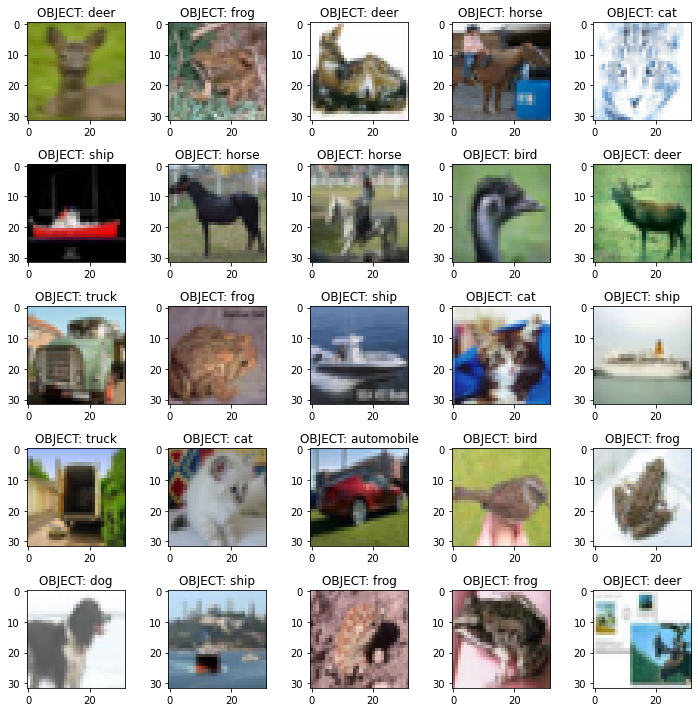

In [12]:
fig, axs = plt.subplots(5, 5)
fig=figsize(10,10)
for i in range(5):
  for j in range(5):
    random = np.random.randint(50000) #random integer number generation
    image_pixels=X_data[random] #pixels of the image 
    axs[i, j].imshow(image_pixels) #plot the image randomly
    axs[i, j].set_title('OBJECT: {0}'.format(label[random]))#title of plot
plt.tight_layout() #method that tunning parameters of image

Now, we convert color images into greyscale images using the average of three channels RGB.

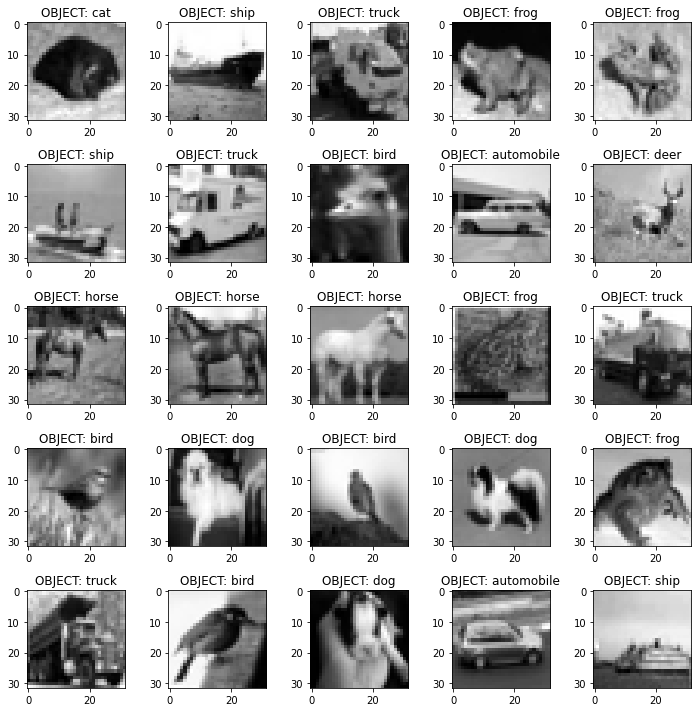

In [13]:
fig, axs = plt.subplots(5, 5)
fig=figsize(10,10)
for i in range(5):
  for j in range(5):
    random = np.random.randint(50000) #random integer number generation
    image_pixels=[] #pixels of the image 
    for m in range(X_data.shape[1]):
      for n in range(X_data.shape[2]):
        image_pixels.append(np.mean(X_data[random][m][n]))
    axs[i, j].imshow(np.array(image_pixels).reshape(32,32),cmap = "gray") #plot the image randomly
    axs[i, j].set_title('OBJECT: {0}'.format(label[random]))#title of plot
plt.tight_layout() #method that tunning parameters of image